In [1]:
using DataFrames
using DataStructures
using Plots
using Distributions
include("../../ThinkBayes.jl/src/ThinkBayes.jl")
using .ThinkBayes

## The Train Problem

In [2]:
hypos=1:1000
prior=pmf_from_seq(hypos);

In [3]:
function update_train(p, data)
    hypos=p.values
    likelihood=1 ./hypos
    impossible=data.>hypos
    likelihood[impossible].=0
    p * likelihood
end

update_train (generic function with 1 method)

In [4]:
posterior=copy(prior)
posterior=update_train(posterior, 60);

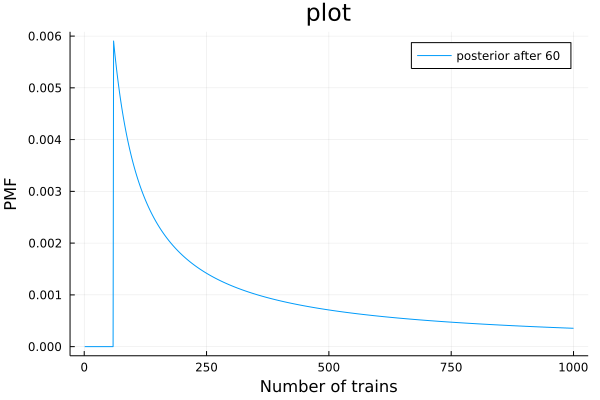

In [5]:
plot(posterior, xaxis=("Number of trains"), yaxis=("PMF"), label="posterior after 60")

In [6]:
max_prob(posterior)

60

In [7]:
mean(posterior)

333.41989326371095

In [8]:
sum(values(posterior).*probs(posterior))

333.41989326370754

In [9]:
for high in [500, 1000, 2000]
    hypos=1:high
    prior=pmf_from_seq(hypos)
    posterior=update_train(prior, 60)
    println("high: ", high, " mean: ", mean(posterior))
end

high: 500 mean: 207.07922798340903


high: 1000 mean: 333.41989326371095
high: 2000 mean: 552.179017164631


In [10]:
dataset=[60, 30, 90]
for high in [500, 1000, 2000]
    hypos=1:high
    prior=pmf_from_seq(hypos)
    posterior=copy(prior)
    for d in dataset
        posterior=update_train(posterior, d)
    end
    println("high: ", high, " mean: ", mean(posterior))
end

high: 500 mean: 151.84958795903833
high: 1000 mean: 164.3055864227335
high: 2000 mean: 171.33818109150937


### Power Law Prior

In [19]:
⍺=1.0
ps=hypos.^(-⍺)
power=pmf_from_seq(hypos, normalize(ps));

In [20]:
uniform=pmf_from_seq(hypos);

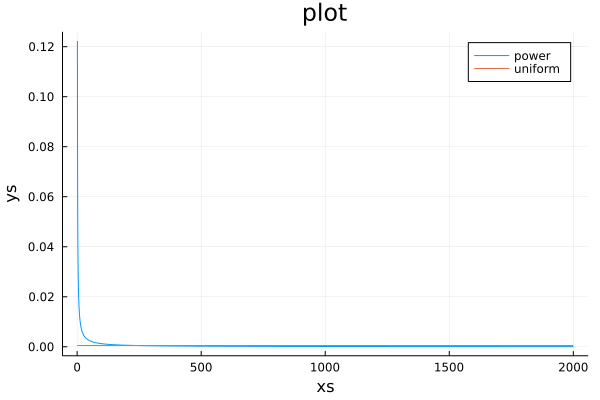

In [21]:
plot(power, label="power")
plot!(uniform, label="uniform")

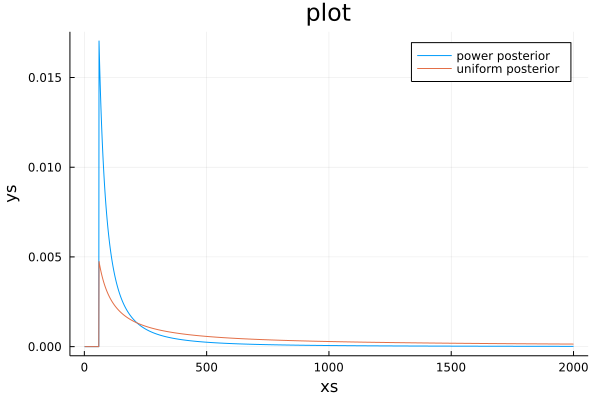

In [22]:
power_post=update_train(power, 60)
uniform_post=update_train(uniform, 60)
plot(power_post, label="power posterior")
plot!(uniform_post, label="uniform posterior")

In [29]:
df=DataFrame(UpperBound=[], PosteriorMean=[])
⍺=1
dataset=[60, 30, 90]
for high in [500, 1000, 2000]
    hypos=1.0:high
    ps=normalize(hypos.^(-⍺))
    prior=pmf_from_seq(hypos, ps)
    power=copy(prior)
    for d in dataset
        power=update_train(power, d)
    end
    push!(df, [high, mean(power)])
end
df

,UpperBound,PosteriorMean
,Any,Any
1,500.0,130.708
2,1000.0,133.275
3,2000.0,133.997


In [31]:
prob_le(power, 100)

0.29374692224957705

In [32]:
quantile(power, 0.5)

113.0

In [33]:
quantile(power, [0.05, 0.95])

2-element Vector{Float64}:
  91.0
 243.0

## The German Tank Problem